In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
# Define dataset paths
train_path = r"C:\Users\Sarvagya\OneDrive\Desktop\New folder\Lang-id\Dataset\train"
test_path = r"C:\Users\Sarvagya\OneDrive\Desktop\New folder\Lang-id\Dataset\test"

categories = ["Hindi", "English"]  # Labels for classification
img_size = (128, 32)  # Resize images for CNN

def load_data(dataset_path, categories):
    images = []
    labels = []
    
    for label, category in enumerate(categories):  
        category_path = os.path.join(dataset_path, category, "image")  # Path to images
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} does not exist!")
            continue
        
        for filename in os.listdir(category_path):  
            img_path = os.path.join(category_path, filename)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")  # Load & convert to grayscale
            img_array = img_to_array(img) / 255.0  # Normalize to [0,1]
            images.append(img_array)
            labels.append(label)  # 0 for Hindi, 1 for English
    
    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_data(train_path, categories)
X_test, y_test = load_data(test_path, categories)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (170605, 128, 32, 1)
Testing data shape: (34112, 128, 32, 1)


In [22]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 32, 1)),  
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Prevent overfitting
    Dense(2, activation='softmax')  # Output layer (2 classes: Hindi & English)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\Sarvagya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 30, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,474,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,762 (5.70 MB)

 Trainable params: 1,493,762 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the CNN model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)



Epoch 1/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.9138 - loss: 0.2005 - val_accuracy: 0.9762 - val_loss: 0.0677
Epoch 2/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step - accuracy: 0.9734 - loss: 0.0765 - val_accuracy: 0.9762 - val_loss: 0.0643
Epoch 3/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.9801 - loss: 0.0564 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 4/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 98s 18ms/step - accuracy: 0.9842 - loss: 0.0456 - val_accuracy: 0.9869 - val_loss: 0.0397
Epoch 5/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 89s 17ms/step - accuracy: 0.9880 - loss: 0.0357 - val_accuracy: 0.9825 - val_loss: 0.0539
Epoch 6/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 129s 24ms/step - accuracy: 0.9898 - loss: 0.0298 - val_accuracy: 0.9858 - val_loss: 0.0458
Epoch 7/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.9915 - loss: 0.0249 - val_accuracy: 0.9883 - val_loss: 0.0395
Epoch 8/10
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 90s 17ms/step - accuracy: 0.9920 

In [9]:
# Save the model
model.save("language_model_word.h5")

In [24]:
import pickle

# Save the history object
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [4]:
from tensorflow import keras

# Load the model
model = keras.models.load_model("language_model_word.h5")


In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")



1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9862 - loss: 0.0500
Test Accuracy: 98.83%


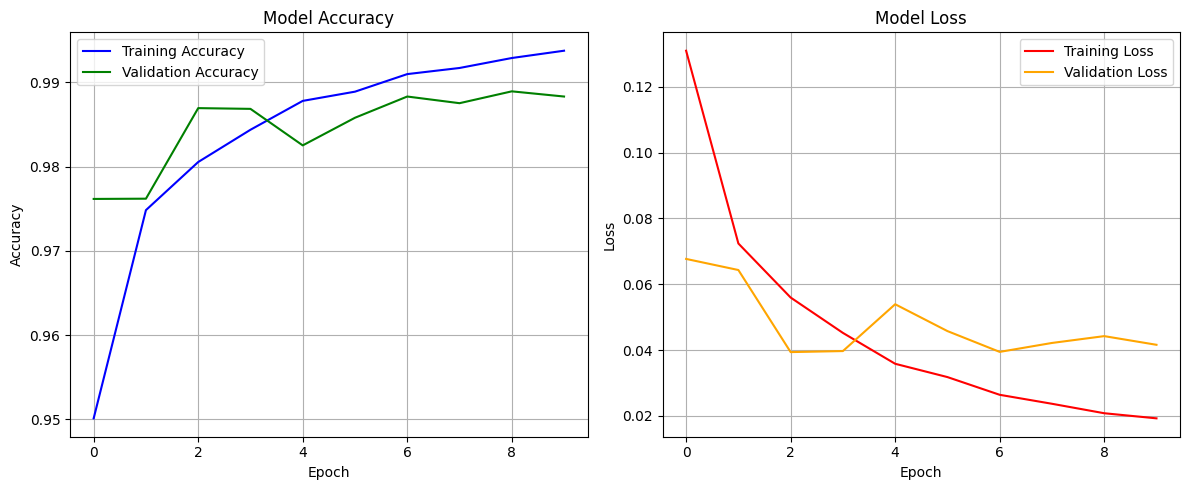

In [26]:
import pickle
import matplotlib.pyplot as plt

# Load the saved history
with open('history.pkl', 'rb') as f:
    history_data = pickle.load(f)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss', color='red')
plt.plot(history_data['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
def predict_language(image_path):
    img = load_img(image_path, target_size=img_size, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # 0 = Hindi, 1 = English
    max_prob = np.max(prediction) 
    return "Hindi" if predicted_class == 0 else "English" , max_prob

# Test with a new image
test_image_path = r"C:\Users\Sarvagya\Downloads\r5wqmyhlil441.jpg"
predicted_language, probability =  predict_language(test_image_path)
print(f"Predicted Language: {predicted_language}")
print(f"Confidence: {probability * 100:.2f}%")
# print("Predicted Language:", predict_language(test_image_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Language: Hindi
Confidence: 100.00%


1066/1066 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Accuracy: 0.9875
Precision: 0.9876
Recall: 0.9875
F1-score: 0.9875


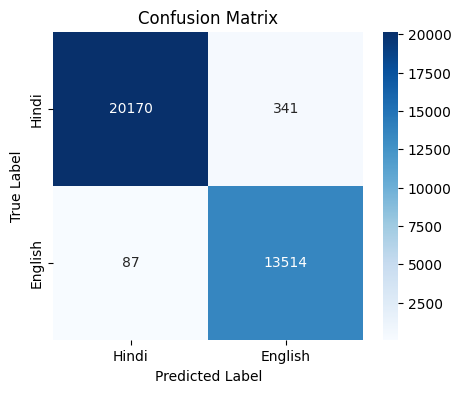

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Get model predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
    y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hindi", "English"], yticklabels=["Hindi", "English"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage:
evaluate_model(model, X_test, y_test)


In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 30, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 6, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,474,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,764 (5.70 MB)

 Trainable params: 1,493,762 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import matplotlib.pyplot as plt

# Assuming your model history is stored in a variable called 'history'
# and you trained using: history = model.fit(...)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
